In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#!wget https://www.dropbox.com/s/t1webrwixdlaacv/space_ga.txt

## Линейная регрессия с батч-оптимизацией(2 балла)

Рассмотрим случай, когда данных в выборке много. В таких случаях используется стохастическая или батч-оптимизация.

Загрузите данные из файла space_ga.csv и нормализуйте их. Мы будем предсказывать первый столбец по шести остальным. Эти данные получены с выборов в США в 1980 году.

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [133]:
data = pd.read_csv('space_ga.txt', header = None, sep = ',')

In [134]:
data.head()

,0,1,2,3,4,5,6
0,-0.661559,9.972920,9.246286,9.004054,12.134915,-86641472.0,32542207.0
1,-0.650859,10.903347,10.221214,9.965758,13.056638,-87754736.0,30654881.0
2,-0.617114,9.722205,8.753529,8.707648,11.630628,-85388993.0,31863073.0
3,-0.639070,9.273691,8.183118,8.277412,11.243712,-87126855.0,32996943.0
4,-0.700274,10.151519,9.207737,9.240676,12.155100,-86566214.0,33979740.0


In [135]:
scaler = preprocessing.MinMaxScaler()
data = scaler.fit_transform(data)

In [136]:
data

array([[0.75875473, 0.5029603 , 0.49601426, ..., 0.4391261 , 0.66387299,
        0.3130767 ],
       [0.76214385, 0.58647418, 0.58223349, ..., 0.52811967, 0.64421093,
        0.2334987 ],
       [0.77283219, 0.48045647, 0.4524365 , ..., 0.39043659, 0.68599381,
        0.28444141],
       ...,
       [0.74661996, 0.41841248, 0.43202961, ..., 0.37701515, 0.24167111,
        0.68175322],
       [0.81474917, 0.39343848, 0.41095753, ..., 0.34054813, 0.29222258,
        0.79227586],
       [0.81335497, 0.36945107, 0.38234982, ..., 0.3164514 , 0.34734789,
        0.78925798]])

In [137]:
y = data[:,0]

In [138]:
X = data [:,1:]

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

Как вы могли заметить, датасет больше предыдущего. На нём мы попробуем батч-оптимизацию.

Измените функцию для минимизации написанную на семинаре так, чтобы на вход они принимала дополнительный параметр — размер батча. Запустите функцию при разных размерах батча. Прокомментируйте результаты.

In [210]:
import random
random.seed(21)

In [211]:
def mini_batch(X, y, learning_rate, eps = 0.0001, batch_size = 5,  w_start = np.random.uniform(-2, 2, X_train.shape[1]),
               compute_learning_rate=None):
    
    ind = [random.randint(1,len(X)-1) for i in range (batch_size)]
    #create array with random index rows (our mini batch)
    A = X[ind[0],:]
    b = []
    b.append(y[ind[0]])
    for i in range(1,batch_size):
        A = np.vstack( (A, X[ind[i],:]) )
        b.append (y[ind[i]])
        
    w = w_start.copy()
    step = 0
    w0 = w
    w = w0 - learning_rate * np.dot(A.T, np.dot(A, w0) - b) / batch_size
    
    while(np.linalg.norm(w-w0) > eps):
        step += 1
        w = w0 - learning_rate * np.dot(A.T, np.dot(A, w0) - b) / batch_size
        w0 = w
        
    return w0

In [142]:
len(X_train)

2174

In [256]:
MAE = []
MSE = []
b_s = []
for i in range (5,len(X_train),5):
    b_s.append(i)
    new_w = mini_batch (X_train, y_train, learning_rate = 0.45, batch_size = i)
    y_pred = np.dot(X_test, new_w)
    MAE.append (metrics.mean_absolute_error(y_test, y_pred))
    MSE.append (metrics.mean_squared_error(y_test, y_pred))

Text(0.5,1,'Mean squared error')

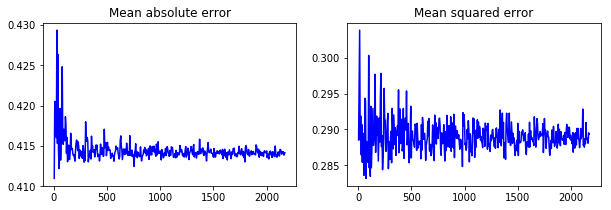

In [257]:
plt.figure(figsize = [10,3])

plt.subplot(1,2,1)
plt.plot(b_s, MAE, c="b")
plt.title("Mean absolute error")
    
plt.subplot(1,2,2)
plt.plot(b_s, MSE, c="b")
plt.title("Mean squared error")

Из графиков видно, что при изменении размера батча, функция ошибки изменяется флактуацией. Причем, результаты значительно лучше при размерах батча в несколько десятков элементов (независимо от выбора гиперпараметра learning_rate)

In [258]:
ind_mse = MSE.index(min(MSE))
ind_mae = MAE.index(min(MAE))

In [259]:
print("Batch size for best MSE and MAE = ", b_s[ind_mse],',', b_s[ind_mae])

Batch size for best MSE and MAE =  75 , 5


In [261]:
print ("MSE = ", MSE[ind_mse], ", MAE =", MAE[ind_mse])

MSE =  0.2831575497234301 , MAE = 0.416388647467957


Минимальная ошибка при размере набора из 55 случайных элементов

## Двумерная классификация(1 балл)

Решим задачу 2D классификации синтетических данных.



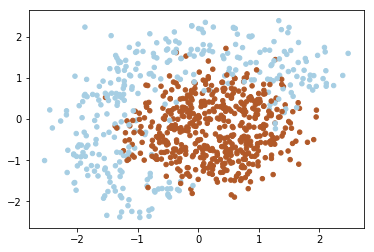

In [264]:
with open('train.npy', 'rb') as fin:
    X = np.load(fin)
    
with open('target.npy', 'rb') as fin:
    y = np.load(fin)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.show()


Как можно заметить, данные сверху линейно неразделимы. Поэтому мы должны добавить дополнительные признаки(или использовать нелинейную модель). Можно заметить, что гиперплоскость разделяющая два класса принимает форму круга, поэтому мы можем добавить квадратичные признаки чтобы сделать классы линейно разделимыми.


![](kernel.png)

In [265]:
def expand(X):
    """
    Adds quadratic features. 
    This expansion allows your linear model to make non-linear separation.
    
    For each sample (row in matrix), compute an expanded row:
    [feature0, feature1, feature0^2, feature1^2, feature0*feature1, 1]
    
    :param X: matrix of features, shape [n_samples,2]
    :returns: expanded features of shape [n_samples,6]
    """
    X_expanded = np.zeros((X.shape[0], 6))
    for i in range (X.shape[0]):
        X_expanded[i] = [X[i][0], X[i][1], X[i][0]**2, X[i][1]**2, X[i][0]*X[i][1],1]
    return X_expanded

In [266]:
X_expanded = expand(X)

In [267]:
# simple test on random numbers

dummy_X = np.array([
        [0,0],
        [1,0],
        [2.61,-1.28],
        [-0.59,2.1]
    ])

# call your expand function
dummy_expanded = expand(dummy_X)

# what it should have returned:   x0       x1       x0^2     x1^2     x0*x1    1
dummy_expanded_ans = np.array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
                               [ 1.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
                               [ 2.61  , -1.28  ,  6.8121,  1.6384, -3.3408,  1.    ],
                               [-0.59  ,  2.1   ,  0.3481,  4.41  , -1.239 ,  1.    ]])

#tests
assert isinstance(dummy_expanded,np.ndarray), "please make sure you return numpy array"
assert dummy_expanded.shape == dummy_expanded_ans.shape, "please make sure your shape is correct"
assert np.allclose(dummy_expanded,dummy_expanded_ans,1e-3), "Something's out of order with features"

print("Seems legit!")



Seems legit!


## Логистическая регрессия(3 балла)

Для классификации объектов мы будем получать вероятность того что объект принадлежит к классу '1'. Чтобы предсказывать вероятность мы будем использовать вывод линейной модели и логистической функции:


$$ a(x; w) = \langle w, x \rangle $$
$$ P( y=1 \; | \; x, \, w) = \dfrac{1}{1 + \exp(- \langle w, x \rangle)} = \sigma(\langle w, x \rangle)$$



In [268]:
def probability(X, w):
    a = np.dot(X,w)
    sigma = 1/(1+np.exp(-a))
    return sigma

In [269]:
dummy_weights = np.linspace(-1, 1, 6)
ans_part1 = probability(X_expanded[:1, :], dummy_weights)[0]

Для логистической регрессии оптимальное значение весов $w$ находится с помощью минимизации кросс-энтропии:


Loss для одного сэмпла: $$ l(x_i, y_i, w) = - \left[ {y_i \cdot log P(y_i = 1 \, | \, x_i,w) + (1-y_i) \cdot log (1-P(y_i = 1\, | \, x_i,w))}\right] $$

Loss для нескольких сэмплов: $$ L(X, \vec{y}, w) =  {1 \over \ell} \sum_{i=1}^\ell l(x_i, y_i, w) $$




In [270]:
def compute_loss(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute scalar loss function L using formula above.
    Keep in mind that our loss is averaged over all samples (rows) in X.
    """
    prob = probability(X, w) #[n_samples,1]
    L = 0
    for i in range (len(X)):
        res = -(y[i]*np.log(prob[i])  + (1-y[i])*np.log(1-prob[i]))
        #print(res)
        L += res
    L = L/(len(X))
    return L


Т.к мы обучаем нашу модель с помощью градиентного спуска мы должны считать градиенты.
Для этого нам нужны производные функции потерь по каждому из весов.


$$ \nabla_w L = {1 \over \ell} \sum_{i=1}^\ell \nabla_w l(x_i, y_i, w) $$ 

Выведите формулу для подсчета градиента.


In [274]:
def compute_grad(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute vector [6] of derivatives of L over each weights.
    beep in mind that our loss is averaged over all samples (rows)
    """
    prob = probability(X, w) #n samples*1
    dL = 0
    for i in range (len(X)):
        row = X[i,:] #[1,6]
        dL += row * (-y[i]*(1-prob[i]) + (1-y[i])*prob[i]) #[1,6]
        
    dL = dL/(len(X))
    return dL
    

Вспомогательная функция для визуализации предсказаний:

In [271]:
from IPython import display

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def visualize(X, y, w, history):
    """draws classifier prediction with matplotlib magic"""
    Z = probability(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.subplot(1, 2, 2)
    plt.plot(history)
    plt.grid()
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    plt.show()

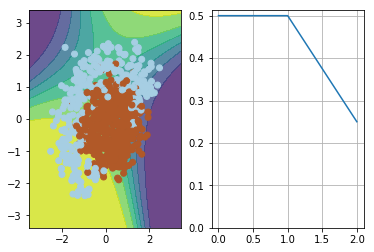

In [272]:
visualize(X, y, dummy_weights, [0.5, 0.5, 0.25])

## Обучение
В данной секции мы будем использовать функции, написанные вами, чтобы обучить наш классификатор с помощью стохастического градиентного спуска.


## Mini-batch SGD(1 балл)

Стохастический градиентный спуск берет рандомный батч из $m$ сэмплов на каждой итерации, подсчитывает градиент функции потерь на этом батче и делает шаг градиентного спуска:

$$ w_t = w_{t-1} - \eta \dfrac{1}{m} \sum_{j=1}^m \nabla_w l(x_{i_j}, y_{i_j}, w_t) $$




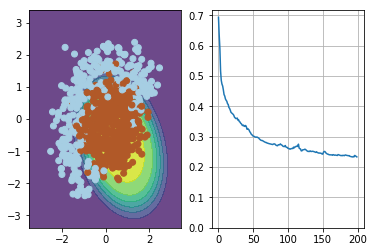

<Figure size 432x288 with 0 Axes>

In [296]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

learning_rate = 0.2 # learning rate
eps = 0.0001

n_iter = 200
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

w = w.copy()

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)
   
    #create array with random index rows (our mini batch)
    A = X_expanded[ind[0],:]
    b = []
    b.append(y[ind[0]])
    for i in range(1,batch_size):
        A = np.vstack( (A, X_expanded[ind[i],:]) )
        b.append (y[ind[i]])
    ###
    w0 = w
    w = w0 - learning_rate * compute_grad(A, b, w0)

visualize(X, y, w, loss)
plt.clf()

In [297]:
min(loss)

0.23340170423949483

## SGD with momentum(1 балл)

Momentum это метод позволяющий корректировать шаг SGD в нужное направление и уменьшать осцилляции как показано на рисунке. Данный эффект достигается с помощью добавления предыдущих шагов с коэффициентом $\alpha$ к текущему градиенту для каждого шага с обновлением весов.
<br>
<br>

$$ \nu_t = \alpha \nu_{t-1} + \eta\dfrac{1}{m} \sum_{j=1}^m \nabla_w l(x_{i_j}, y_{i_j}, w_t) $$
$$ w_t = w_{t-1} - \nu_t$$

<br>


![](sgd.png)



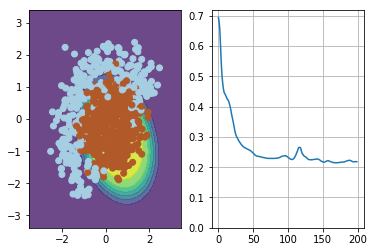

<Figure size 432x288 with 0 Axes>

In [289]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

learning_rate = 0.05 # learning rate
alpha = 0.9 # momentum
nu = np.zeros_like(w)

n_iter = 200
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    #create array with random index rows (our mini batch)
    A = X_expanded[ind[0],:]
    b = []
    b.append(y[ind[0]])
    for i in range(1,batch_size):
        A = np.vstack( (A, X_expanded[ind[i],:]) )
        b.append (y[ind[i]])
    ###
    
    nu0 = nu
    w0 = w
    nu = alpha*nu0 + learning_rate * compute_grad(A, b, w0)
    w = w0 - nu

    if (np.linalg.norm(nu) < eps):
        break 

visualize(X, y, w, loss)
plt.clf()

In [294]:
min(loss)

0.2145787026088572

## ADAM(2 балла)
Реализуйте метод ADAM, использующий градиенты и квадраты градиентов сглаженные экспоненциальным скользящим средним:


\begin{eqnarray}
m_t &=& \beta_1 m_{t-1} + (1-\beta_1) g_t\\
s_t &=& \beta_2 s_{t-1} + (1-\beta_2) g_t^2 \\
w_t &=& w_{t-1} - \eta \times \frac{\sqrt{ 1 -  \beta_2}}{ 1 - \beta_1} \times \frac{ m_t }{ \sqrt{s_t+eps}}
\end{eqnarray}

In [299]:
import math

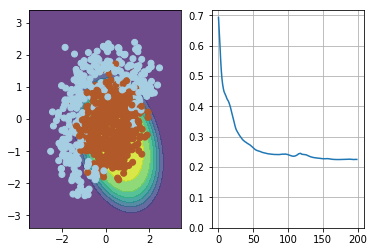

<Figure size 432x288 with 0 Axes>

In [306]:
np.random.seed(42)

w = np.array([0, 0, 0, 0, 0, 1.])

learning_rate = 0.15 # learning rate
beta_1 = 0.9 # moving average of gradient
beta_2 = 0.999 # moving average of gradient norm squared
delta = None # we start with None so that you can update this value correctly on the first iteration
eps = 1e-8

n_iter = 200
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
m0 = s0 = 0

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    #create array with random index rows (our mini batch)
    A = X_expanded[ind[0],:]
    b = []
    b.append(y[ind[0]])
    for i in range(1,batch_size):
        A = np.vstack( (A, X_expanded[ind[i],:]) )
        b.append (y[ind[i]])
    ###
    
    w0 = w
    grad = compute_grad(A, b, w0)
    m = beta_1*m0 + (1-beta_1)*grad
    s = beta_2 * s0 + (1-beta_2) * np.dot(grad,grad.T)
    
    delta = (m / (1-beta_1**i)) * (math.sqrt( (1-beta_2**i) /(s + eps)) )
    
    w = w0 - learning_rate * delta
    
    m0 = m
    s0 = s

visualize(X, y, w, loss)
plt.clf()

In [305]:
min(loss)

0.2411014191992378